In [1]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt
import backtesters
import trading_strategies as strg

In [9]:
def plot_with_transactions(stock_name, start_date, end_date, strategy_fn):
        data, _ = backtesters.backtest(stock_name, start_date, end_date, strategy_fn)

        # Define the plot style
        mc = mpf.make_marketcolors(up='green', down='red', inherit=True)
        s  = mpf.make_mpf_style(base_mpf_style='nightclouds', marketcolors=mc)

        window_length=150
        name = f'MVG_{window_length}'
        apds = [mpf.make_addplot(data[name], color='blue', width=1.2),
                mpf.make_addplot(data['Purchases'], type='scatter', markersize=10, marker='o', color='orange'),
                mpf.make_addplot(data['Sales'], type='scatter', markersize=10, marker='o', color='purple')]

        mpf.plot(data, type='candle', style=s, addplot=apds, title=f"{ticker} Candlestick Chart with MVG, Purchases, and Sales",
             ylabel='Price ($)', volume=True)


[*********************100%%**********************]  1 of 1 completed
/om2/user/galanti/miniconda3/envs/pytorch/lib/python3.9/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


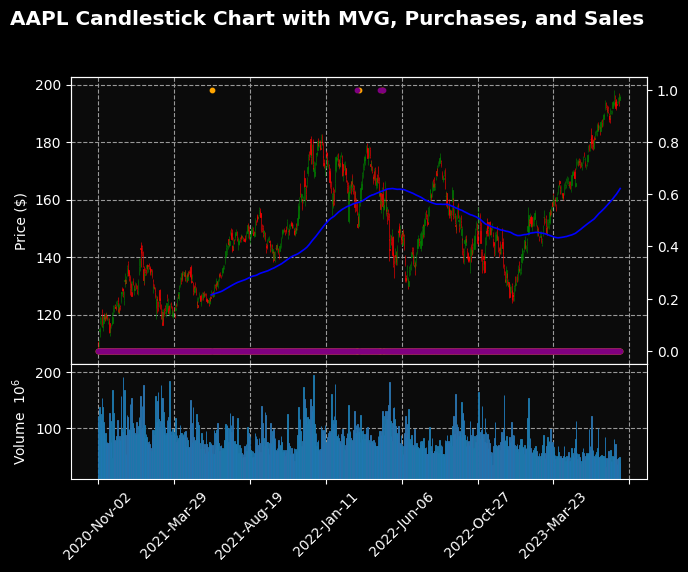

In [8]:
# Example usage
ticker = 'AAPL'
start_date = '2020-11-01'
end_date = '2023-08-01'
strategy_fn = strg.michu_strategy
plot_with_transactions(ticker, start_date, end_date, strategy_fn)